In [1]:
import imageio

In [2]:
import requests

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import IPython.display as dp

In [5]:
img="dark_knight.jpg"

In [6]:
source = imageio.imread(img)

In [7]:
import numpy as np

In [8]:
def grayscale(rgb):
    return np.dot(rgb[...,:3],[0.299,0.587,0.114])

In [9]:
gryscl_img = grayscale(source)

In [10]:
inv_img = (255 - gryscl_img)

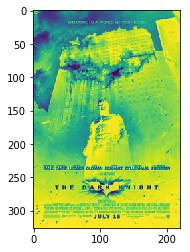

In [12]:
plt.imshow(inv_img)

In [13]:
import scipy.ndimage

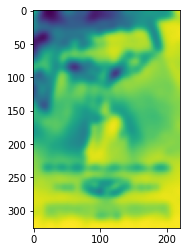

In [14]:
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img,sigma=5)
plt.imshow(blurred_img)

In [15]:
def dodging(blur_img,gryscl_img):
    resultant_dodge = blur_img*255/(255-gryscl_img)
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [16]:
target_img = dodging(blurred_img,gryscl_img)

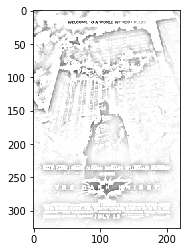

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img,cmap="gray")

In [18]:
plt.imsave('target_image.png',target_img,cmap='gray',vmin=0,vmax=255)